In [66]:
import matplotlib.pyplot as plt
import pathlib
import numpy as np
from utils import read_im, save_im, normalize
output_dir = pathlib.Path("image_solutions")
output_dir.mkdir(exist_ok=True)

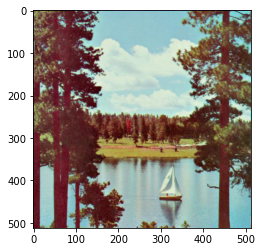

In [67]:
im = read_im(pathlib.Path("images", "lake.jpg"))
plt.imshow(im)

In [68]:
def convolve_im(im, kernel,
    ):
    """ A function that convolves im with kernel
    
    Args:
        im ([type]): [np.array of shape [H, W, 3]]
        kernel ([type]): [np.array of shape [K, K]]
    
    Returns:
        [type]: [np.array of shape [H, W, 3]. should be same as im]
    """
    assert len(im.shape) == 3
    
    # flip kernel 180 degrees
    kernel = np.flipud(np.fliplr(kernel))
  
    xker = kernel.shape[0]
    yker = kernel.shape[1]
    pad_widthx = xker//2
    pad_widthy = yker//2
    
    # pad image in x and y
    mat = np.pad(im, pad_width=((pad_widthx, pad_widthx), (pad_widthy, pad_widthy),(0, 0)), mode='constant')

    
    for color in range(3):
        for i in range(im.shape[0]):
            for j in range(im.shape[1]):
                sliced_im = mat[i:i+xker, j:j+xker]
                im[i][j][color] = ((sliced_im[:, :, color] * kernel).sum()).sum()
    return im


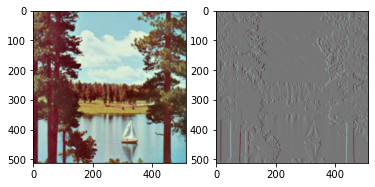

In [69]:
if __name__ == "__main__":
    # Define the convolutional kernels
    h_b = 1 / 256  * np.array([
        [1, 4, 6, 4, 1],
        [4, 16, 24, 16, 4],
        [6, 24, 36, 24, 6],
        [4, 16, 24, 16, 4],
        [1, 4, 6, 4, 1]
    ])
    sobel_x = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])

    # Convolve images
    im_smoothed = convolve_im(im.copy(), h_b)
    save_im(output_dir.joinpath("im_smoothed.jpg"), im_smoothed)
    im_sobel = convolve_im(im, sobel_x)
    save_im(output_dir.joinpath("im_sobel.jpg"), im_sobel)

    # DO NOT CHANGE. Checking that your function returns as expected
    assert isinstance(im_smoothed, np.ndarray),         f"Your convolve function has to return a np.array. " +        f"Was: {type(im_smoothed)}"
    assert im_smoothed.shape == im.shape,         f"Expected smoothed im ({im_smoothed.shape}" +         f"to have same shape as im ({im.shape})"
    assert im_sobel.shape == im.shape,         f"Expected smoothed im ({im_sobel.shape}" +         f"to have same shape as im ({im.shape})"
    plt.subplot(1, 2, 1)
    plt.imshow(normalize(im_smoothed))

    plt.subplot(1, 2, 2)
    plt.imshow(normalize(im_sobel))
    plt.show()